In [1896]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1897]:
data=pd.read_csv("Titanic-Dataset.csv")

# **Dataset**

In [1898]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1899]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Terlihat pada data.tail() dataset ini memiliki 891 baris data.

In [1900]:
# Melihat statistika deskriptif
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Eksplorasi Awal**

In [1901]:
# Jumlah total penumpang
PassengerId = len(data)
print(f"Jumlah total penumpang: {PassengerId}")

Jumlah total penumpang: 891


Jumlah total penumpang dalam data adalah 891 penumpang.

Berikut merupakan tabel dan grafik jumlah penumpang yang selamat dan tidak selamat dalam data.

In [1902]:
# Tabel jumlah penumpang yang selamat dan tidak selamat
Survived = data['Survived'].value_counts().rename(index={0: 'Tidak Selamat', 1: 'Selamat'})
print(Survived)


Survived
Tidak Selamat    549
Selamat          342
Name: count, dtype: int64


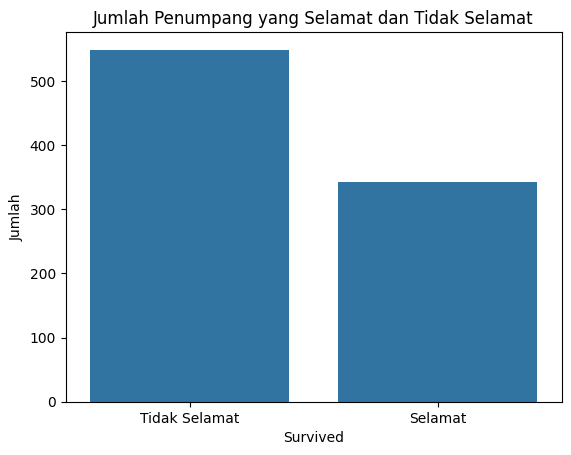

In [1903]:
# Grafik batang jumlah penumpang yang selamat dan tidak selamat
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=data, x='Survived')
plt.xticks([0,1], ['Tidak Selamat', 'Selamat'])
plt.title('Jumlah Penumpang yang Selamat dan Tidak Selamat')
plt.ylabel('Jumlah')
plt.show()

Pada tabel dan grafik terlihat jumlah penumpang yang selamat adalah 342 penumpang dan jumlah penumpang yang tidak selamat adalah 549 penumpang.

In [1904]:
# Rata-rata umur penumpang
rata_rata_umur = data['Age'].mean()
print(f"Rata-rata umur penumpang: {rata_rata_umur:.2f} tahun")

Rata-rata umur penumpang: 29.70 tahun


Rata-rata umur penumpang adalah 29,70 tahun.

In [1905]:
# Penumpang termuda dan tertua
termuda = data.loc[data['Age'].idxmin()]
tertua = data.loc[data['Age'].idxmax()]

print("\nPenumpang Termuda:")
print(termuda[['Name', 'Age']])
print("\nPenumpang Tertua:")
print(tertua[['Name', 'Age']])


Penumpang Termuda:
Name    Thomas, Master. Assad Alexander
Age                                0.42
Name: 803, dtype: object

Penumpang Tertua:
Name    Barkworth, Mr. Algernon Henry Wilson
Age                                     80.0
Name: 630, dtype: object


Penumpang termuda memiliki nama Thomas, Master, dan Assad Alexander.

Penumpang tertua memiliki nama Barkworth dan Mr. Algernoon Henry Wilson.

In [1906]:
# Jumlah penumpang berdasarkan jenis kelamin
jenis_kelamin = data['Sex'].value_counts()
print(jenis_kelamin)

Sex
male      577
female    314
Name: count, dtype: int64


Jumlah penumpang berdasarkan jenis kelamin dengan male (laki-laki) berjumlah 577 penumpang dan jumlah penumpang berdasarkan jenis kelamin dengan female (perempuan) berjumlah 314 penumpang.

Jumlah penumpang berdasarkan jenis kelamin yang lebih banyak yaitu male (laki-laki) berjumlah 577.

Berikut visualisasi jumlah penumpang berdasarkan jenis kelamin.

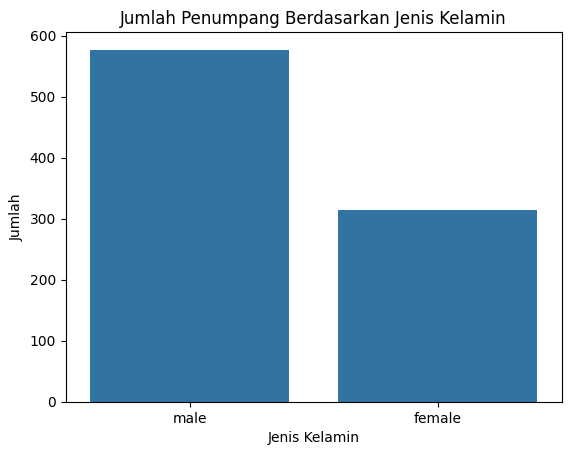

In [1907]:
# Visualisasi jumlah penumpang berdasarkan jenis kelamin
sns.countplot(data=data, x='Sex')
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.ylabel('Jumlah')
plt.xlabel('Jenis Kelamin')
plt.show()

In [1908]:
# Jumlah penumpang berdasarkan kelas
kelas = data['Pclass'].value_counts().sort_index()
print(kelas)

Pclass
1    216
2    184
3    491
Name: count, dtype: int64


Jumlah penumpang berdasarkan kelas (Pclass) dengan kelas 1 216 penumpang, kelas 2 184 penumpang, dan kelas 3 491 penumpang.

In [1909]:
# Persen dan total data yang berada di kelas 1
persen_kelas_1 = (kelas[1] / PassengerId) * 100
print(f"\nPersentase penumpang di kelas 1: {persen_kelas_1:.2f}%")


Persentase penumpang di kelas 1: 24.24%


Total data yang berada di kelas 1 sebanyak 24,24%.

Berikut visualisasi jumlah penumpang berdasarkan kelas.

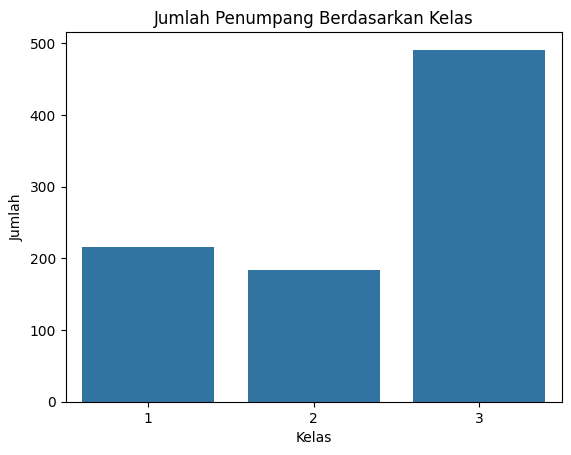

In [1910]:
# Visualisasi
sns.countplot(data=data, x='Pclass')
plt.title('Jumlah Penumpang Berdasarkan Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

# **Preprocessing**

# **Cek Missing Values**

In [1911]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Berdasarkan output di atas dapat disimpulkan bahwa terdapat informasi berupa dataset yang memiliki 12 kolom dengan jumlah maksimal baris pada kolom sebanyak 891 baris. Selain itu, terdapat beberapa kolom yang memiliki jumlah baris kurang dari 891. Sehingga, terdeteksi ada missing values. Kemudian, akan dilakukan proses identifikasi lebih lanjut.

In [1912]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Pada data isnull ini dapat memperlihatkan data kosong (missing values) yaitu dengan keterangan true berarti ada yang kosong.

In [1913]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Berdasarkan output tersebut diperoleh kolom yang terdapat missing values yaitu kolom Age sebanyak 177, kolom Cabin sebanyak 687, kolom Embarked sebanyak 2 penumpang.

In [1914]:
# Mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

np.int64(866)

 Sehingga, jumlah missing values secara keseluruhan sebanyak 866. Adanya missing values ini dapat mempengaruhi analisis data karena dapat menghasilkan kesimpulan yang keliru atau tidak akurat dan bias atau tidak representatif.

Sudah diketahui bahwa terdapat missing values pada kolom Age, Cabin, dan Embarked sehingga perlu dilakukan handling missing values.

# **Handling Missing Values**

Metode yang paling sesuai untuk menangani missing values pada kolom Age, Cabin, dan Embarked adalah dengan cara imputasi atau isi dengan nilai yang sudah ditentukan yaitu menggunakan mean/median/mode.

Kolom Age dapat menggunakan median karena data tidak berdistribusi normal/ada outlier.

Kolom Cabin dan Embarked dapat menggunakan mode karena data Cabin dan Embarked dalam bentuk kategorik.

A. Age menggunakan median.

In [1915]:
# Melihat isi dalam kolom Age
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [1916]:
# Jumlah missing value Age
np.sum(data['Age'].isnull())

np.int64(177)

In [1917]:
# Mengisi missing value Age
data['Age']=data['Age'].fillna(data['Age'].median())

In [1918]:
# Jumlah missing value Age
np.sum(data['Age'].isnull())

np.int64(0)

In [1919]:
# Melihat isi dalam kolom Age
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

B. Cabin menggunakan mode.

In [1920]:
# Melihat isi dalam kolom Cabin
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [1921]:
# Jumlah missing value Cabin
np.sum(data['Cabin'].isnull())

np.int64(687)

In [1922]:
#  Mengisi missing value Cabin
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

In [1923]:
# Jumlah missing value Cabin
np.sum(data['Cabin'].isnull())

np.int64(0)

In [1924]:
# Melihat isi dalam kolom Cabin
data['Cabin'].unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

C. Embarked menggunakan mode.

In [1925]:
# Melihat isi dalam kolom Embarked
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1926]:
# Jumlah missing value Embarked
np.sum(data['Embarked'].isnull())

np.int64(2)

In [1927]:
#  Mengisi missing value Embarked
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [1928]:
# Jumlah missing value Embarked
np.sum(data['Embarked'].isnull())

np.int64(0)

In [1929]:
# Melihat isi dalam kolom Embarked
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

# **Cek Outlier**

Outlier merupakan data yang berada jauh dari nilai lainnya dalam sebuah dataset. Data ini menyimpang secara signifikan dari pola umum kelompok data tersebut. Alasan adanya outlier kemungkinan kesalahan pengukuran, input data, atau lainnya.

Outlier dapat dideteksi menggunakan beberapa metode:

A. Boxplot → Visualisasi distribusi dan outlier.

B. Interquartile Range (IQR) → Mengidentifikasi outlier berdasarkan distribusi kuartil.

A. Boxplot

In [1930]:
numerical_cols = data.select_dtypes(include=['number']).columns
print("Fitur Numerik:", numerical_cols)

Fitur Numerik: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


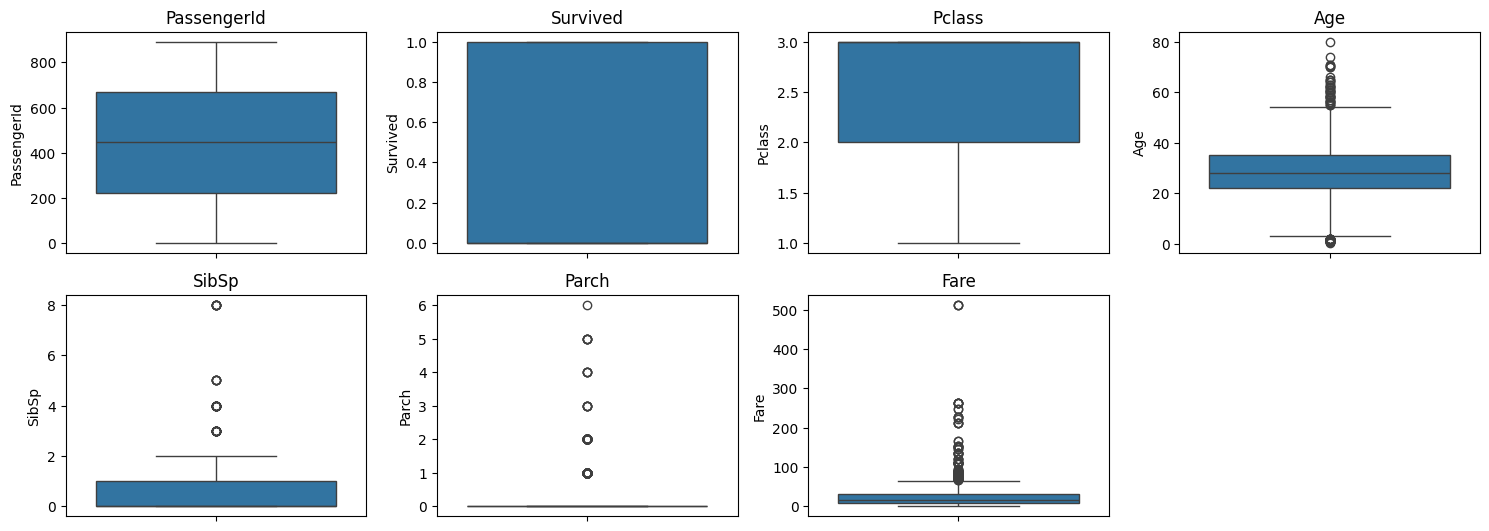

In [1931]:
import matplotlib.pyplot as plt
import seaborn as sns

#kolom numerik yang ingin dicek outliernya
num_cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

#visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

PassengerId memiliki titik di dalam rentang yang tidak menunjukkan adanya outlier.

Survived memiliki titik di dalam rentang yang tidak menunjukkan adanya outlier.

Pclass memiliki titik di dalam rentang yang tidak menunjukkan adanya outlier.

Age memiliki beberapa titik di luar rentang yang menunjukkan adanya outlier.

SibSp memiliki beberapa titik di luar rentang yang menunjukkan adanya outlier.

Parch memiliki beberapa titik di luar rentang yang menunjukkan adanya outlier.

Fare memiliki beberapa titik di luar rentang yang menunjukkan adanya outlier.


B. IQR

In [1932]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

#cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

PassengerId: 0 outliers
Survived: 0 outliers
Pclass: 0 outliers
Age: 66 outliers
SibSp: 46 outliers
Parch: 213 outliers
Fare: 116 outliers


Age memiliki 66 outlier.

SibSp memiliki 46 outlier.

Parch memiliki 213 outlier.

Fare memiliki 116 outlier.

Keberadaan outlier terhadap analisis dapat mengubah nilai rata - rata dalam dataset yang dapat menyebabkan memberikan gambaran dan kesimpulan yang tidak akurat tentang data.

# **Penanganan Outlier**

Berdasarkan jumlah dan dampak outlier ada metode yang bisa digunakan yaitu winsorizing (mengganti outlier dengan batas IQR). Alasan: Jika data penting dan tidak boleh dihapus kita bisa mengganti outlier dengan batas kuartil.

In [1933]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

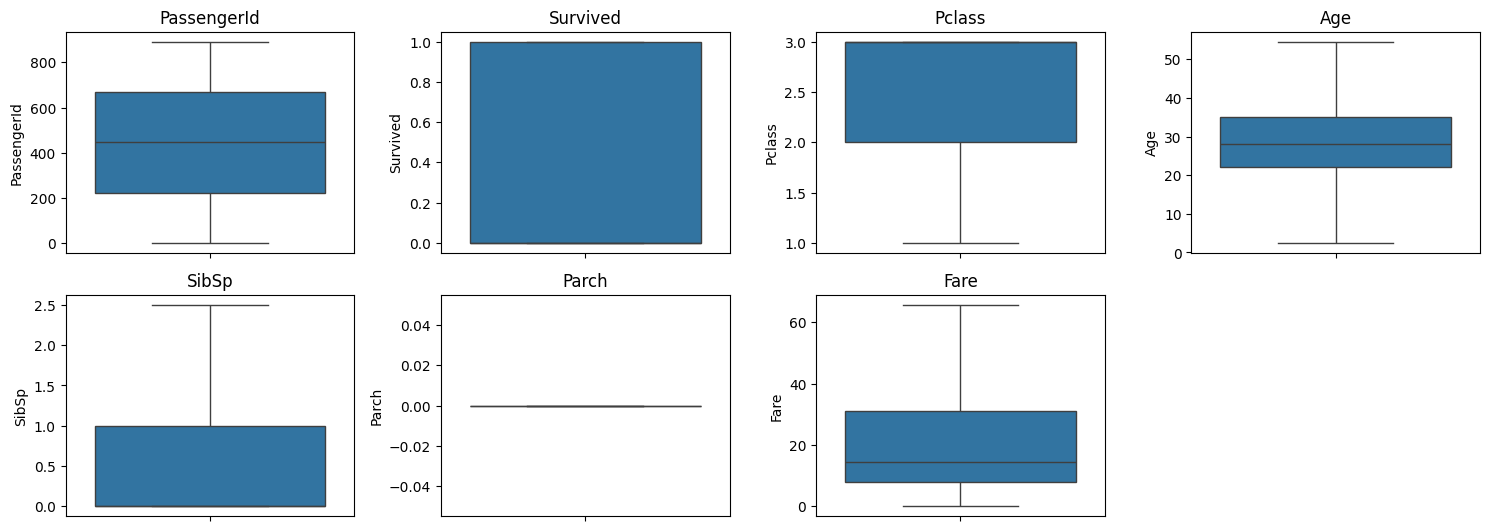

In [1934]:
#cek boxplot lagi

num_cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# **Encoding**

Encoding adalah proses mengubah data kategorik menjadi bentuk numerik agar dapat digunakan dalam algoritma Machine Learning.

Ada beberapa metode encoding yang umum digunakan yaitu

A. One-Hot Encoding (OHE): Mengubah kategori menjadi beberapa kolom biner (0/ 1). Digunakan jika jumlah kategori tidak terlalu banyak.

B. Ordinal Encoding: Mengubah kategori yang memiliki urutan jelas menjadi angka berurutan.

C. Target Encoding: Menggunakan rata-rata target.

Berikut metode encoding yang digunakan pada Sex, Cabin, dan Embarked.

**A. Sex**

In [1935]:
#melihat isi dalam kolom
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [1936]:
from sklearn.preprocessing import OneHotEncoder
One_encoder = OneHotEncoder()

In [1937]:
One_encoder = OneHotEncoder (handle_unknown = 'ignore', sparse_output=False).set_output(transform='pandas')

In [1938]:
encoded_sex = One_encoder.fit_transform(data[['Sex']])

In [1939]:
encoded_sex

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [1940]:
data = pd.concat ([data, encoded_sex], axis=1).drop(columns=['Sex'])

In [1941]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",22.0,1.0,0.0,A/5 21171,7.2500,B96 B98,S,0.0,1.0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,65.6344,C85,C,1.0,0.0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",26.0,0.0,0.0,STON/O2. 3101282,7.9250,B96 B98,S,1.0,0.0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,53.1000,C123,S,1.0,0.0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",35.0,0.0,0.0,373450,8.0500,B96 B98,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",27.0,0.0,0.0,211536,13.0000,B96 B98,S,0.0,1.0
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",19.0,0.0,0.0,112053,30.0000,B42,S,1.0,0.0
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1.0,0.0,W./C. 6607,23.4500,B96 B98,S,1.0,0.0
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",26.0,0.0,0.0,111369,30.0000,C148,C,0.0,1.0


In [1942]:
data.to_excel ('dataset_setelah_preprocessing_sex.xlsx', index=False)

**B. Cabin**

In [1943]:
#melihat isi dalam kolom
data['Cabin'].unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [1944]:
data['Deck'] = data['Cabin'].str.extract(r'([A-Z])')

#One-Hot Encoding
data = pd.get_dummies(data, columns=['Deck'], prefix='Cabin', drop_first=True)

data.drop('Cabin', axis=1, inplace=True)

**C. Embarked**

In [1945]:
#melihat isi dalam kolom
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [1946]:
from sklearn.preprocessing import OneHotEncoder
One_encoder = OneHotEncoder()

In [1947]:
One_encoder = OneHotEncoder (handle_unknown = 'ignore', sparse_output=False).set_output(transform='pandas')

In [1948]:
encoded_embarked = One_encoder.fit_transform(data[['Embarked']])

In [1949]:
encoded_embarked

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [1950]:
data = pd.concat ([data, encoded_embarked], axis=1).drop(columns=['Embarked'])

In [1951]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",22.0,1.0,0.0,A/5 21171,7.2500,0.0,...,True,False,False,False,False,False,False,0.0,0.0,1.0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,65.6344,1.0,...,False,True,False,False,False,False,False,1.0,0.0,0.0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",26.0,0.0,0.0,STON/O2. 3101282,7.9250,1.0,...,True,False,False,False,False,False,False,0.0,0.0,1.0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,53.1000,1.0,...,False,True,False,False,False,False,False,0.0,0.0,1.0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",35.0,0.0,0.0,373450,8.0500,0.0,...,True,False,False,False,False,False,False,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",27.0,0.0,0.0,211536,13.0000,0.0,...,True,False,False,False,False,False,False,0.0,0.0,1.0
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",19.0,0.0,0.0,112053,30.0000,1.0,...,True,False,False,False,False,False,False,0.0,0.0,1.0
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1.0,0.0,W./C. 6607,23.4500,1.0,...,True,False,False,False,False,False,False,0.0,0.0,1.0
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",26.0,0.0,0.0,111369,30.0000,0.0,...,False,True,False,False,False,False,False,1.0,0.0,0.0


In [1952]:
data.to_excel ('dataset_setelah_preprocessing_embarked.xlsx', index=False)

In [1953]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    float64
 6   Parch        891 non-null    float64
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_female   891 non-null    float64
 10  Sex_male     891 non-null    float64
 11  Cabin_B      891 non-null    bool   
 12  Cabin_C      891 non-null    bool   
 13  Cabin_D      891 non-null    bool   
 14  Cabin_E      891 non-null    bool   
 15  Cabin_F      891 non-null    bool   
 16  Cabin_G      891 non-null    bool   
 17  Cabin_T      891 non-null    bool   
 18  Embarked_C   891 non-null    float64
 19  Embarked

# **Modelling**

Data training: data yang sudah diketahui sebelumnya untuk label kelas yang akan digunakan untuk membangun model classifer.

Data testing: data yang belum diketahui label kelasnya menggunakan model classifer yang sudah dibangun.

Pembagian data training dan testing adalah keputusan yang penting dalam pembuatan model yang dapat diandalkan. Perlu dilakukan pembagian karena untuk mengukur kemampuan generalisasi model terhadap data baru dan menghindari model terlalu baik pada data training namun buruk pada data baru.

Besarnya pembagian data:

Pembagian yang sering digunakan adalah 70-30 atau 80-20, di mana sekitar 70% atau 80% dari data digunakan untuk training dan sisa 30% atau 20% digunakan untuk testing.

Data yang Lebih Besar: Jika datasetnya besar pemisahan seperti 90-10 atau bahkan 95-5 mungkin dapat dilakukan. Model dengan lebih banyak data training cenderung memiliki kinerja yang lebih baik, tetapi juga ingin memiliki cukup data di testing untuk evaluasi yang akurat.

Untuk pembagian data dapat memilih menggunakan 80-20 dengan 80% dari data digunakan untuk training dan 20% digunakan untuk testing. Pembagian ini dilakukan karena umumnya proporsi ini memberikan keseimbangan yang baik antara data yang cukup untuk melatih model secara efektif dan data yang cukup untuk menguji performanya secara representatif.

In [1954]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Hasil dari fungsi train_test_split adalah empat keluaran:

X_train: Data training untuk fitur-fitur.

X_test: Data testing untuk fitur-fitur.

y_train: Data training untuk target atau label.

y_test: Data testing untuk target atau label.

Dengan memisahkan dataset menjadi empat bagian X_train dan y_train digunakan untuk melatih model, sementara X_test dan y_test digunakan untuk menguji performa model yang telah dilatih. Sehingga dapat membantu dalam mengevaluasi seberapa baik model yang dihasilkan mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya.

## **Model Klasifikasi dari 3 Algoritma**

a. Logistic regression digunakan untuk memperkirakan discrete value berdasarkan satu
set variabel independent yang diberikan. Sehingga bisa memperediksi kemungkinan
terjadinya suatu peristiwa dengan menyesuaikan data ke fungsi logistic, saat memprediksi
probabilitas nilai output antara 0 dan 1.

b. Decisions tress mengklasifikasikan instance dengan mengurutkan berdasarkan nilai
fitur. Setiap mode adalah fitur dari sebuah instance. Mode ini harus diklasifikasikan
dan setiap cabang mewakili nilai yang dapat diasumsikan oleh node.

c. Random forest adalah algoritma fleksibel yang digunakan untuk kalsifikasi dan regresi.
Forest mereferensikan kumpulan decision trees yang tidak berkorelasi kemudian
digabungkan bersama untuk mengurangi varians dan membuat prediksi data yang lebih
akurat.

In [1955]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [1956]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    float64
 6   Parch        891 non-null    float64
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_female   891 non-null    float64
 10  Sex_male     891 non-null    float64
 11  Cabin_B      891 non-null    bool   
 12  Cabin_C      891 non-null    bool   
 13  Cabin_D      891 non-null    bool   
 14  Cabin_E      891 non-null    bool   
 15  Cabin_F      891 non-null    bool   
 16  Cabin_G      891 non-null    bool   
 17  Cabin_T      891 non-null    bool   
 18  Embarked_C   891 non-null    float64
 19  Embarked

# **Logistic Regression**

Berikut merupakan cara kerja logistic regression.

In [1957]:
# # Pra-pemrosesan
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

model = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(random_state=42))])

In [1958]:
# Latih model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Pclass', 'Sex_female',
                                                   'Sex_male', 'Embarked_C',
                                                   'Embarked_Q',
                                                   'Embarked_S'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [1959]:
# Prediksi pada set pengujian
y_pred = model.predict(X_test)

In [1960]:
# Evaluasi model
print("--- Logistic Regression ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

--- Logistic Regression ---
Akurasi: 0.7932960893854749
Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.81      0.84      0.83       105
         1.0       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:
 [[88 17]
 [20 54]]


# Decisions Tress

Berikut merupakan cara kerja decisions trees.

In [1961]:
# Pra-pemrosesan
preprocessor_dt = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features), # Tidak ada scaling
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

model_dt = Pipeline(steps=[('preprocessor', preprocessor_dt),
                          ('classifier', DecisionTreeClassifier(random_state=42))])

In [1962]:
# Latih model
model_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Pclass', 'Sex_female',
                                                   'Sex_male', 'Embarked_C',
                                                   'Embarked_Q',
                                                   'Embarked_S'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [1963]:
# Prediksi
y_pred_dt = model_dt.predict(X_test)

In [1964]:
# Evaluasi
print("\n--- Decision Tree ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_dt)}")
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


--- Decision Tree ---
Akurasi: 0.7541899441340782
Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       105
         1.0       0.70      0.72      0.71        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179

Confusion Matrix:
 [[82 23]
 [21 53]]


# **Random forest**

Berikut merupakan cara kerja random forest.

In [1965]:
# Pra-pemrosesan
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

model_rf = Pipeline(steps=[('preprocessor', preprocessor_rf),
                          ('classifier', RandomForestClassifier(random_state=42))])

In [1966]:
# Latih model
model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Pclass', 'Sex_female',
                                                   'Sex_male', 'Embarked_C',
                                                   'Embarked_Q',
                                                   'Embarked_S'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [1967]:
# Prediksi
y_pred_rf = model_rf.predict(X_test)

In [1968]:
# Evaluasi
print("\n--- Random Forest ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_rf)}")
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


--- Random Forest ---
Akurasi: 0.8156424581005587
Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       105
         1.0       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179

Confusion Matrix:
 [[91 14]
 [19 55]]


In [1969]:
# Evaluasi model dari 3 algoritma yang berbeda
y_pred_logistic = logistic_model.predict(X_test)
y_pred_dt = decision_tree_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

print("\n--- Hasil Evaluasi Model ---")

def evaluate_model(model_name, y_true, y_pred):
    print(f"\n--- {model_name} ---")
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    print(f"Akurasi: {accuracy:.4f}")
    print("Laporan Klasifikasi:\n", report)
    print("Confusion Matrix:\n", cm)
    return accuracy, report, cm

logistic_accuracy, logistic_report, logistic_cm = evaluate_model("Logistic Regression", y_test, y_pred_logistic)
dt_accuracy, dt_report, dt_cm = evaluate_model("Decision Tree", y_test, y_pred_dt)
rf_accuracy, rf_report, rf_cm = evaluate_model("Random Forest", y_test, y_pred_rf)


--- Hasil Evaluasi Model ---

--- Logistic Regression ---
Akurasi: 0.7933
Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.81      0.84      0.83       105
         1.0       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:
 [[88 17]
 [20 54]]

--- Decision Tree ---
Akurasi: 0.7542
Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       105
         1.0       0.70      0.72      0.71        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179

Confusion Matrix:
 [[82 23]
 [21 53]]

--- Random Forest ---
Akurasi: 0.8156
Laporan Klasifikasi:
               precision    recall  f1-score   suppo

Model klasifikasi dari algoritma.

Klasifikasi:

Kelas 0 (tidak selamat) terdapat precision, recall, f1-score, dan support.

Kelas 1 (selamat) terdapat precision, recall, f1-score, dan support.

Macro avg terdapat precision, recall, f1-score, dan support.

Weighted terdapat precision, recall, f1-score, dan support.

Confusion Matrix:

[[TN FP]

[FN TP]]

Keterangan:

TN: penumpang dengan benar diprediksi tidak selamat.

FP: penumpang diprediksi selamat padahal tidak selamat.

FN: penumpang diprediksi tidak selamat padahal selamat.

TP: penumpang dengan benar diprediksi selamat.


Logistic Regression:

Akurasi:  0.7933 atau 79,33%.

Klasifikasi:
accuracy 0.79


Confusion Matrix:

[[88 17]

 [20 54]]

Keterangan:

TN: 88 penumpang dengan benar diprediksi tidak selamat.

FP: 17 penumpang diprediksi selamat padahal tidak selamat.

FN: 20 penumpang diprediksi tidak selamat padahal selamat.

TP: 54 penumpang dengan benar diprediksi selamat.


Decision Tree:

Akurasi:  0.7542 atau 75,42%.

Klasifikasi:
accuracy 0.75


Confusion Matrix:

[[82 23]

 [21 53]]

Keterangan:

TN: 82 penumpang dengan benar diprediksi tidak selamat.

FP: 23 penumpang diprediksi selamat padahal tidak selamat.

FN: 21 penumpang diprediksi tidak selamat padahal selamat.

TP: 53 penumpang dengan benar diprediksi selamat.


Random Forest:

Akurasi:  0.8156 atau 81,56%.

Klasifikasi:
accuracy 0.82


Confusion Matrix:

[[91 14]

 [19 55]]

Keterangan:

TN: 91 penumpang dengan benar diprediksi tidak selamat.

FP: 14 penumpang diprediksi selamat padahal tidak selamat.

FN: 19 penumpang diprediksi tidak selamat padahal selamat.

TP: 55 penumpang dengan benar diprediksi selamat.


Membandingkan hasil dari ketiga algoritma:

a. Logistic regression 0.79

b. Decisions tress 0.75

c. Random forest 0.82

Yang lebih bagus adalah random forest.


In [1970]:
# Menentukan Model Terbaik (berdasarkan akurasi)
best_accuracy = max(logistic_accuracy, dt_accuracy, rf_accuracy)
best_model_name = ""
best_report = {}
best_cm = np.array([[0, 0], [0, 0]])

if best_accuracy == logistic_accuracy:
    best_model_name = "Logistic Regression"
    best_report = pd.DataFrame.from_dict(classification_report(y_test, y_pred_logistic, output_dict=True))
    best_cm = logistic_cm
elif best_accuracy == dt_accuracy:
    best_model_name = "Decision Tree"
    best_report = pd.DataFrame.from_dict(classification_report(y_test, y_pred_dt, output_dict=True))
    best_cm = dt_cm
else:
    best_model_name = "Random Forest"
    best_report = pd.DataFrame.from_dict(classification_report(y_test, y_pred_rf, output_dict=True))
    best_cm = rf_cm

print(f"\n--- Model Terbaik ({best_model_name}) ---")


--- Model Terbaik (Random Forest) ---


Terbukti model terbaik adalah random forest. Random forest dapat memprediksi dataset dengan baik karena algoritma fleksibel yang digunakan untuk kalsifikasi dan regresi. Forest mereferensikan kumpulan decision trees yang tidak berkorelasi kemudian digabungkan bersama untuk mengurangi varians dan membuat prediksi data yang lebih akurat.


# **Evaluasi**

In [1971]:
# Evaluasi Model Terbaik Random Forest
print("\n--- Random Forest ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_rf)}")
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


--- Random Forest ---
Akurasi: 0.8156424581005587
Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       105
         1.0       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179

Confusion Matrix:
 [[91 14]
 [19 55]]


Klasifikasi Random Forest:

Kelas 0 (tidak selamat)

Kelas 1 (selamat)

Pada kelas 1 (penumpang selamat):

Nilai Precision: 0.80

NIlai Recall: 0.74

Confusion Matrix:

[[TN FP]

[FN TP]]

Confusion Matrix Random Forest:

 [[91 14]

 [19 55]]

Keterangan:


FP: penumpang diprediksi selamat padahal tidak selamat.

TP: penumpang dengan benar diprediksi selamat.

Maka,

Penumpang diprediksi selamat: FP + TP = 14 + 55 = 69 penumpang.

Penumpang benar-benar selamat: TP = 55 penumpang.

Visualisasi:

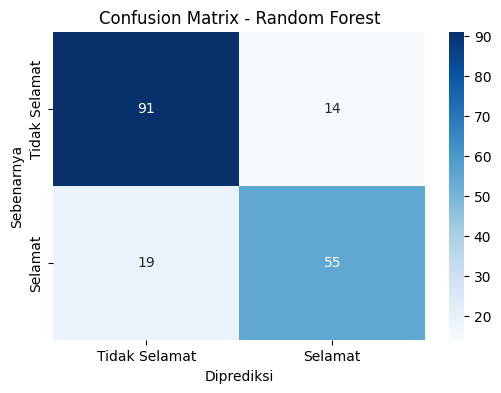

In [1972]:
# Visualisasi confusion matrix untuk model terbaik ---
plt.figure(figsize=(6, 4))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Selamat', 'Selamat'], yticklabels=['Tidak Selamat', 'Selamat'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Diprediksi')
plt.ylabel('Sebenarnya')
plt.show()